<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team44/blob/main/TecMty_kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tecnológico de Monterrey**

#Maestría en Inteligencia Artificial Aplicada

> Curso: Ciencia y Analítica de Datos

> Entregable : Semana 7 - Actividad Regresiones y K means - Notebook 2

>Fecha: 9/11/2022

>Profesores:

>* María de la Paz Rico Fernández
>* Roberto Antonio Guevara González

> Alumno:

*   AQUILES YONATAN ARMENTA HERNANDEZ - A01793252

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [139]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

Encuentra el numero ideal de almacenes, justifica tu respuesta:

* Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
* ¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

* ¿qué librerías nos pueden ayudar a graficar este tipo de datos?
* ¿Consideras importante que se grafique en un mapa?, ¿por qué?
* Agrega las conclusiones

In [197]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from sklearn.cluster import KMeans
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

Importa la base de datos

In [198]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [199]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

In [203]:
latlong=df[["latitude","longitude"]]

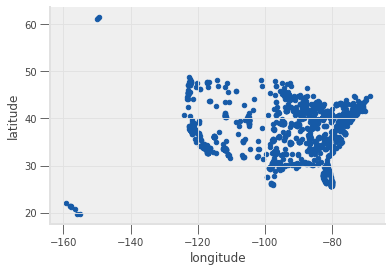

In [204]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [205]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [206]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [207]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [208]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [209]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [210]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

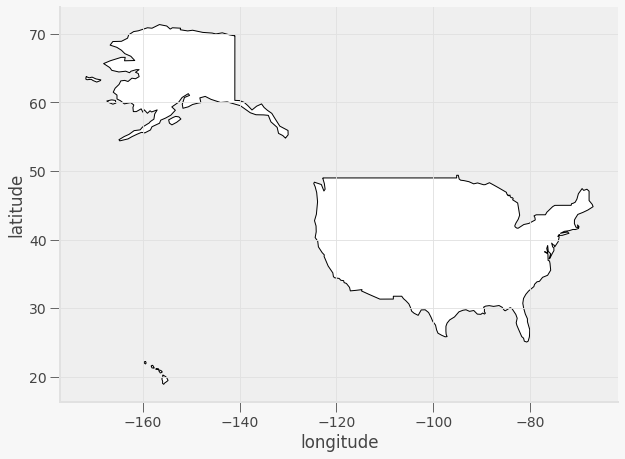

In [211]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

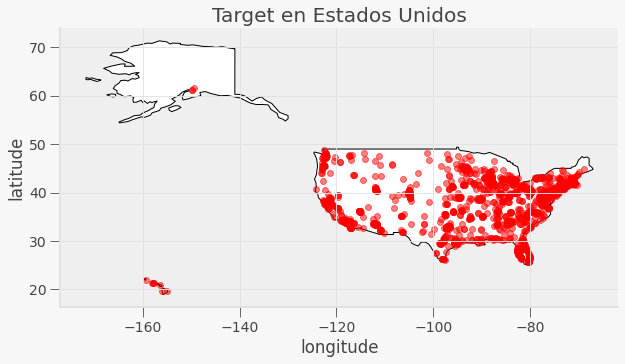

In [212]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [213]:
def group_assignment(data,centroids):
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])
        min_dist = min(dist)
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    return grouping_vec_c

In [214]:
def update_centroid(data, grouping, centroids):
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids

In [215]:
def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

In [216]:
def Kmeans_alg(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False
    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping,new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            centroids = new_centroids
    return new_centroids, grouping, J_obj_vector, iteration

In [217]:
array = latlong.to_numpy()
A = Kmeans_alg(array,array[:6])

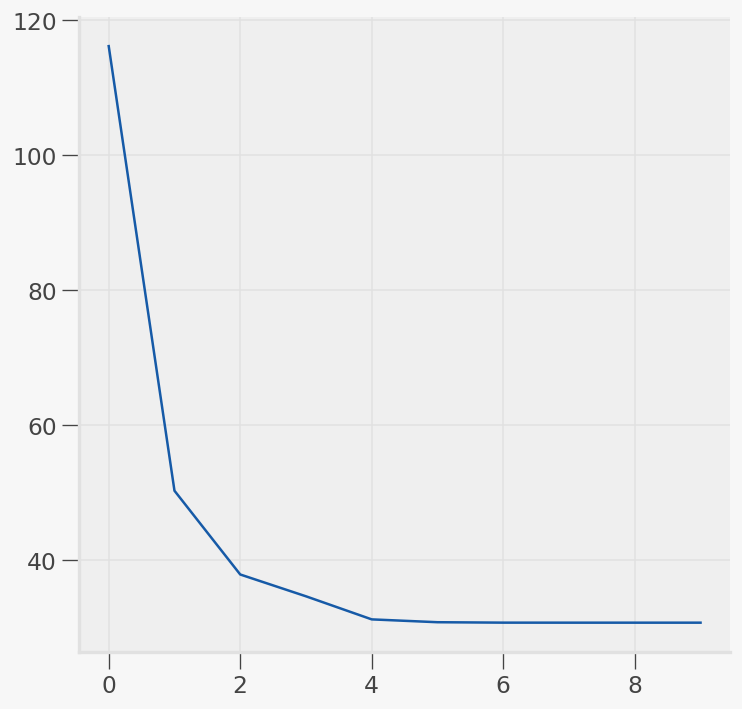

In [218]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(list(range(A[-1])),A[2])
plt.show()

# Kmeans con dos Clusters

In [219]:
model = KMeans(n_clusters = 2, max_iter = 1000)
model.fit(latlong)
y_labels = model.labels_

In [220]:
y_kmeans = model.predict(latlong)
print('Predicciones ',y_kmeans)

Predicciones  [1 1 1 ... 0 0 0]


In [221]:
df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = latlong.columns
df_centers

,latitude,longitude
0,37.717441,-116.900187
1,37.814310,-84.198138


In [222]:
geolocator = Nominatim(user_agent="my-application") #Inicializamos la libreria
location = geolocator.reverse('37.717441	, -116.900187')
locationII = geolocator.reverse('37.814310	, -84.198138')
print(location.address) 
print(locationII.address) 

Nye County, Nevada, United States
342, Walker Parke Road, Madison County, Kentucky, 40475, United States


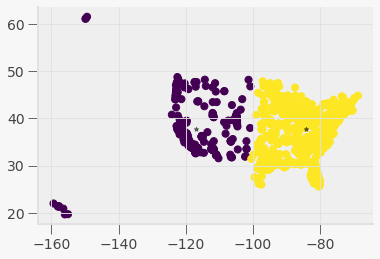

In [223]:
plt.scatter(latlong["longitude"], latlong["latitude"], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(df_centers["longitude"], df_centers["latitude"], c='black',marker="*", s=20, alpha=.5);

# Kmeans con tres Clusters

In [224]:
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(latlong)
y_labels = model.labels_

In [225]:
y_kmeans = model.predict(latlong)
print('Predicciones ',y_kmeans)

Predicciones  [2 2 2 ... 1 2 1]


In [226]:
df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = latlong.columns
df_centers

,latitude,longitude
0,37.789554,-78.569908
1,37.487342,-118.624473
2,37.980063,-93.327172


In [227]:
geolocator = Nominatim(user_agent="my-application") #Inicializamos la libreria
location = geolocator.reverse('37.789554	, -78.569908')
locationII = geolocator.reverse('37.487342	, -118.624473')
locationIII = geolocator.reverse('37.980063		, -93.327172')
print(location.address) 
print(locationII.address) 
print(locationIII.address) 

Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
Paradise Estates, Mono County, California, United States
Hickory County, Missouri, United States


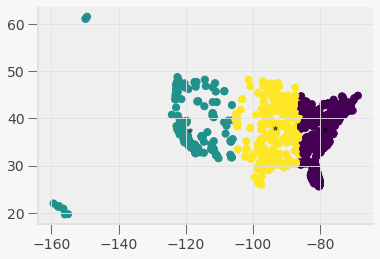

In [228]:
plt.scatter(latlong["longitude"], latlong["latitude"], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(df_centers["longitude"], df_centers["latitude"], c='black',marker="*", s=20, alpha=.5);

# Kmeans con cinco Clusters

In [229]:
model = KMeans(n_clusters = 5, max_iter = 1000)
model.fit(latlong)
y_labels = model.labels_

In [230]:
y_kmeans = model.predict(latlong)
print('Predicciones ',y_kmeans)

Predicciones  [4 4 4 ... 3 3 1]


In [231]:
df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = latlong.columns
df_centers

,latitude,longitude
0,41.760441,-88.370288
1,37.579774,-119.176343
2,40.345897,-75.598224
3,34.420357,-98.266337
4,31.103912,-82.933092


In [232]:
geolocator = Nominatim(user_agent="my-application") #Inicializamos la libreria
location = geolocator.reverse('41.760441	, -88.370288')
locationII = geolocator.reverse('37.579774	, -119.176343')
locationIII = geolocator.reverse('40.345897		, -75.598224')
locationIV = geolocator.reverse('34.420357		, -98.266337')
locationV = geolocator.reverse('31.103912		, -82.933092')
print(location.address) 
print(locationII.address) 
print(locationIII.address) 
print(locationIV.address) 
print(locationV.address) 

2264, Wynwood Lane, Aurora, Aurora Township, Kane County, Illinois, 60506, United States
Iron Lake Trail, Madera County, California, United States
Schlegel Road, Douglass Township, Montgomery County, Pennsylvania, 19525, United States
County Road E1790, Cotton County, Oklahoma, United States
Foyd Lee Loop, Clinch County, Georgia, United States


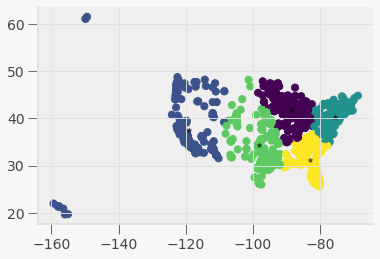

In [233]:
plt.scatter(latlong["longitude"], latlong["latitude"], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(df_centers["longitude"], df_centers["latitude"], c='black',marker="*", s=20, alpha=.5);

# Conclusiones

Para esta entrega realizamos el analisis de 2 Clusters, 3 Clusters y 5 cluster y llegamos a la siguientes conclusiones:

Para Kmeans con dos clusters no es una opcion viable porque los productos a distribuir en todos puntos va a generar costos altos Gasolina y tiempos de entrega largos.

Para Kmeans con tres clusters podria ser una opcion porque los centros de distribucion estan posicionados en tres puntos que permiten disminuir los tiempos de entrega y un gasto menor en combustibles de transportacion.

Para Kmeans con cinco clusters es sin duda una mejor opcion porque los costos de combustibles y tiempos de entrega se disminuyen en gran medida porque hay mas centros, pero hay que analizar el costo de implementar 5 centros puede aumentar los costos de implementacion.